In [20]:
%matplotlib inline
import pandas as pd
import urllib2
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt



In [21]:
def get_links_from_front_pages(n):
    reddit_url = 'http://www.reddit.com/'
    comment_pages = []
    soups = []
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'
    headers = {'User-Agent' : 'super happy flair bot by /u/spladug'}
    for page_index in range(n):
        req = urllib2.Request(reddit_url, headers=headers)
        page = urllib2.urlopen(req).read()
        soup = BeautifulSoup(page)
        soups.append(soup)
        for link in (soup.find_all('a',class_='bylink comments may-blank')):
            href = (link.get('href'))
            if href:
                comment_pages.append(href)
        for a in soup.find_all('a'):
            if a.get('href'):
                 if(('count=%d'%((page_index+1)*25)) in a.get('href')):
                    print(a.get('href'))
                    reddit_url= a.get('href')
#         time.sleep(5)
    return list(set(comment_pages))

# print (get_links_from_front_pages(1))

In [22]:
def info_from_comments_page(links):
    results = []
    headers = {'User-Agent' : 'super happy flair bot by /u/spladug'}
    for url in links:
        try:
            print("fetching details for: ", url)
            req = urllib2.Request(url,headers=headers)
            page = urllib2.urlopen(req).read()
            soup = BeautifulSoup(page)
            title = soup.title.string
#             print(title)
#             upvotes = soup.find_all("div", class_="score dislikes")[0].getText()
            upvotes_and_percent_upvotes = soup.find_all("div",class_="score")[0].getText().replace(',','').replace('points (','').replace('point (','').replace('%','')
            x = upvotes_and_percent_upvotes.split()
            upvotes = int(x[0])
            b =  int(x[1])
            downvotes = int(((upvotes*100)/b)*(100 - (b))*0.01)
            time = soup.find_all("p",class_="tagline")[0].find_all("time",class_="live-timestamp")[0].get("datetime")
#             print(time)
#             print(upvotes)
#             print(upvotes_and_percent_upvotes)
#             print(upvotes)
#             print(b)
#             print("downvote",downvotes)
            results.append((title, upvotes, downvotes, pd.to_datetime(time)))
        except KeyboardInterrupt:
            break
        except:
            pass
    return results
            

In [23]:
comments = get_links_from_front_pages(5)
print(len(comments))



https://www.reddit.com/?count=25&after=t3_541zcp
https://www.reddit.com/?count=50&after=t3_541hi6
https://www.reddit.com/?count=75&after=t3_542aem
https://www.reddit.com/?count=100&after=t3_542dlx
https://www.reddit.com/?count=125&after=t3_53z6lq
146


In [25]:
results = info_from_comments_page(comments)
# print(results)
titles, upvotes, downvotes, dates = zip(*results)
df = pd.DataFrame({'title' : titles, 'upvotes' : upvotes, 'downvotes' : downvotes, 'date' : dates}, index=dates)
print df


('fetching details for: ', 'https://www.reddit.com/r/sports/comments/53zwo3/the_military_paid_pro_sports_teams_104_million/')
('fetching details for: ', 'https://www.reddit.com/r/AskReddit/comments/543dfz/what_do_you_think_will_be_the_main_reason_for/')
('fetching details for: ', 'https://www.reddit.com/r/funny/comments/541r2w/my_cousin_decided_to_study_in_australia_this_was/')
('fetching details for: ', 'https://www.reddit.com/r/GetMotivated/comments/542fhj/since_class_is_permanent_here_is_a_blast_from_the/')
('fetching details for: ', 'https://www.reddit.com/r/personalfinance/comments/540157/just_found_out_my_parents_have_had_70k_for_me_in/')
('fetching details for: ', 'https://www.reddit.com/r/funny/comments/541h1t/albanian_virus/')
('fetching details for: ', 'https://www.reddit.com/r/tifu/comments/540v2a/tifu_and_my_dog_tried_to_stab_my_wife_with_a_knife/')
('fetching details for: ', 'https://www.reddit.com/r/nosleep/comments/53z7a5/the_first_girl/')
('fetching details for: ', 'htt

In [26]:
df.sort('date',inplace=True)
# print(comments[0])
df.head()

/Users/anshu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,downvotes,title,upvotes
2016-09-22 13:59:49,2016-09-22 13:59:49,53,"""The Comparative Badness for Animals of Suffer...",394
2016-09-22 14:28:10,2016-09-22 14:28:10,104,The First Girl : nosleep,940
2016-09-22 15:28:24,2016-09-22 15:28:24,242,Cunk on Shakespeare (2016) - BBC documentary o...,1775
2016-09-22 16:43:00,2016-09-22 16:43:00,185,Pesticide manufacturers' own tests reveal seri...,2909
2016-09-22 16:49:31,2016-09-22 16:49:31,62,The military paid pro sports teams $10.4 milli...,505


(array([ 736229.625     ,  736229.70833333,  736229.79166667,
         736229.875     ,  736229.95833333,  736230.04166667,
         736230.125     ,  736230.20833333]),
 <a list of 8 Text xticklabel objects>)

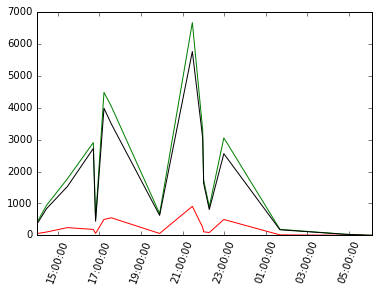

In [28]:
plt.plot(df['date'],df['upvotes'],"g")
plt.plot(df['date'],df['downvotes'],"r")
plt.plot(df['date'],df['upvotes']-df['downvotes'],"k")
plt.xticks(rotation = 70)


